# <p style="background-color:#9c2162;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CHURN PREDICTION FOR BANK CUSTOMERS</p>

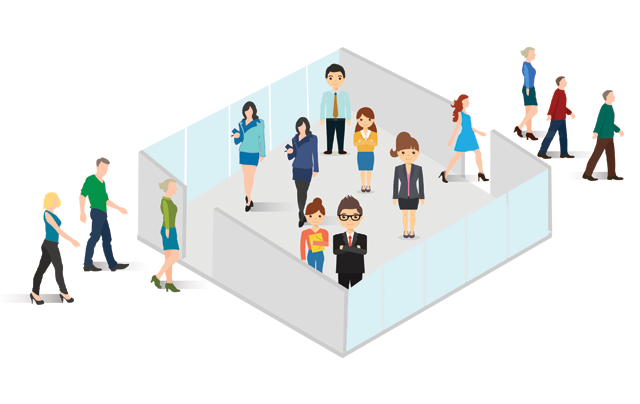

<p style="background-color:#9c2162;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:left;border-radius:10px 10px;">Image credit : https://www.smartlook.com/blog/customer-churn-retention/</p> 

<a id="toc"></a>

## <h3 style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;" class="list-group-item list-group-item-action active" data-toggle="list" role="tablist" aria-controls="home">TABLE OF CONTENTS</h3>

* [   PREFACE](#0)
* [1) LIBRARIES NEEDED IN THE STUDY](#1)
    * [1.1 User Defined Functions](#1.1)
* [2) DATA](#2)
    * [2.1 Context](#2.1)
    * [2.2 About the Features](#2.2) 
    * [2.3 What the Problem is](#2.3) 
* [3) ANALYSIS](#3)
    * [3.1) Reading the Data](#3)
* [4) EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION](#4)
    * [4.1 - A General Looking at the Data](#4.1)
    * [4.2 - Convert Multi-Index Columns To One Level](#4.2)
    * [4.3 - Handling with Missing Values](#4.3)
    * [4.4 The Examination of Target Variable](#4.4)
    * [4.5 - The Examination of Skewness, Kurtosis & Multicollinearity](#4.5)
    * [4.6 Numerical vs. Categorical](#4.6)
        * [4.6.1 Spliting Dataset into Numeric & Categoric Features](#4.6.1)
        * [4.6.2 The Examination of Numerical Features](#4.6.2)
        * [4.6.3 The Examination of Categorical Features](#4.6.3)
        * [4.6.4 Dummy Operation](#4.6.4)  
    * [4.7 Descriptive Statistics](#4.7)
* [5) DATA PREPROCESSING](#5)
    * [5.1 Train|Test Split Operations](#5.1)
    * [5.2 Scaling Operation](#5.2)
* [6) MODELING & MODEL PERFORMANCE](#6)        
    * [6.1 Modelling Without "class_weigth"](#6.1)
        * [6.1.1 The Evaluation of Model with Default Parameters (without class_weigth)](#6.1.1)
    * [6.2 Modelling With "class_weigth"](#6.2)
        * [6.2.1 The Evaluation of Model With "class_weigth"](#6.2.1)
    * [6.3 Modelling With Best Parameters (GridsearchCV)](#6.3)
        * [6.3.1 The Evaluation of ROC and AUC for Model without "class_weigth"](#6.3.1)
        * [6.3.2 The Evaluation of ROC and AUC for Model with "class_weigth"](#6.3.2)
        * [6.3.3 The Evaluation of ROC and AUC for GridsearchCV Model](#6.3.3)
* [7) Final Model & Model Deployment](#7) 
    * [7.1 Saving the Best Model](#7.1)
    * [7.2 Loading the Model & Scaler](#7.2)
    * [7.3 Predicting Real Life Case](#7.3)


<a id="0"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PREFACE</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**In this Exploratory Data Analysis (EDA) and Deep Learning Analysis, this study will examine the dataset named as "Churn_Modelling" which can also be reached via the 'Churn_Modelling.csv.csv' file at Kaggle website [external link text](https://www.kaggle.com/shrutimechlearn/churn-modelling).**

**This study, in general, will cover what any beginner in Deep Learning can do as much as possible for a better understanding with the given dataset not only by examining its various aspects but also visualising it. Later S/he will be familiar with Clustering algorithms in Deep Learning with Keras.**

<a id="1"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">1 - LIBRARIES NEEDED IN THE STUDY</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**First, if you do NOT have the following libraries in your kernel, just install them since you have to need them to import some libraries.**

In [1]:
# !pip install pyforest
# !pip install ipython
# !pip install pyclustertend
# !pip install xlrd
# !pip install Autoviz
# !pip install colorama
# !pip3 install termcolor
# !pip install termcolor
# !pip install pandas-profiling

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.warn("this will not show")

# Figure & Display options
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
import matplotlib.colors as mcolors
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

from termcolor import colored
import missingno as msno 

import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored, cprint

# Import Pandas Profiling
import pandas_profiling

ModuleNotFoundError: No module named 'plotly'

<a id="1.1"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">1.1 User Defined Functions</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**We have defined some useful user defined functions**

In [ ]:
###############################################################################

def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

###############################################################################

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

###############################################################################

<a id="2"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">2 - DATA</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**This is a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. Therefore, the study will try to predict behaviors/attributes to retain bank customers.**

**For a better understanding and more information, please refer to [external link text](https://www.kaggle.com/shrutimechlearn/churn-modelling)**

<a id="2.1"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">2.1 Context</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**Each row represents a bank customer, each column contains customer’s attributes described on the column Metadata.**

**The data set includes information about:**

- **Customers who left bank – the column is called "Exited"**
- **Customer account information that each customer has 'creditscore', 'balance', 'numofproducts', 'hascrcard',  'isactivemember'.**
- **Demographic info about customers – surname, geography, gender, age range, tenure and 'estimatedsalary'.**

<a id="2.2"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">2.2 About The Features</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**The features in the given dataset are:**

- **rownumber:** Row Numbers from 1 to 10000.

- **customerid:** A unique ID that identifies each customer.

- **surname:** The customer’s surname.

- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.

- **geography:** The country from which the customer belongs to.

- **Gender:** The customer’s gender: Male, Female

- **Age:** The customer’s current age, in years, at the time of being customer.

- **tenure:** The number of years for which the customer has been with the bank.


- **balance:** Bank balance of the customer.

- **numofproducts:** the number of bank products the customer is utilising.

- **hascrcard:** The number of credit cards given to the customer by the bank.

- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")

- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

<a id="2.3"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">2.3 What The Problem Is</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**- In the given study, we have a classification problem.**

- Based on the data and data dictionary, We have a classification problem.
- We will try to predict behaviors/attributes to retain bank customers on the target variable in the given dataset.
- The Target variable in the given dataset is "exited".
- We will make classification on the target variable "exited".
- Lastly we will build a model to get best classification possible on the target variablevia Deep Learning algorithms.
- For that we will examine whether the target variable is balanced or imbalanced.
- As we will see later, our target variable has imbalanced data
- For that reason we are not going to use Accuracy score,
- Based on the problem on the hand, we will use Recall score.

<a id="3"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">3 - ANALYSIS</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

<a id="3.1"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">3.1 Reading The Data</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**How to read and assign the dataset as df. [external link text](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) (You can define it as what you want instead of df)**

In [ ]:
df0 = pd.read_csv(r"../input/churn-modelling/Churn_Modelling.csv")
df = df0.copy()

In [ ]:
df

<a id="4"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">4 - EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>


**Before performing Machine Learning algorithms, you need to know the data well in order to label the observations correctly. You need to analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.**

**So, in this Exploratory Data Analysis section the data will be analyzed by summarizing its main characteristics, using statistical graphics and other data visualization methods. As such the reader will be familiar with what the data can tell.**

**The Framework in This Section:**

    1. Implement basic steps to see how is your data looks like
    2. Check for missing values
    3. Drop the features that not suitable for modelling
    4. Implement basic visualization steps such as histogram, countplot, heatmap
    5. Convert categorical variables to dummy variables

**You can use first_looking(df) user defined function above and profile_report() for getting a general insight before going further in the analysis**

Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. Similarly, for EDA, profile_report() is One-Line Magical Code creating reports in the interactive HTML format which is quite easy to understand and analyze the data. In short, at the first hand, what pandas profiling does is to save us all the work of visualizing and understanding the distribution of each variable.

**For a better understanding and more information, please refer to [external link text](https://www.analyticsvidhya.com/blog/2021/06/generate-reports-using-pandas-profiling-deploy-using-streamlit/) & [external link text](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3)**

In [ ]:
df.profile_report()

In [ ]:
first_looking(df)

In [ ]:
df.head(3)

In [ ]:
df.tail(3)

In [ ]:
df.sample(10)

In [ ]:
df.columns

In [ ]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df= df.apply(lambda x: x.astype(float) if x.dtype=="int64" else x)

In [ ]:
df.info()

In [ ]:
df.head(3)

**Let's remove the columns of "rownumber", "customerid", "surname" from the given dataset since they do NOT have any contribution to classification in our analysis.**

In [ ]:
df.drop(["rownumber", "customerid", "surname"], axis=1, inplace=True)

In [ ]:
df.head(3)

**Let's get rid of commas in the column of "balance" and "estimatedsalary"**

In [ ]:
pd.options.display.float_format = '{:}'.format

In [ ]:
df.head(3)

In [ ]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

In [ ]:
df.describe(include=object).T

In [ ]:
df.nunique()

In [ ]:
# to find how many unique values numerical features have

for col in df.select_dtypes(include=[np.number]).columns:
  print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

In [ ]:
# to find how many unique values object features have

for col in df.select_dtypes(include="object").columns:
  print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

In [ ]:
df.duplicated().value_counts()

In [ ]:
df.shape

<a id="4.3"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">4.3 Handling With Missing Values</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**Missing data (or missing values) is defined as the data value that is not stored for a variable in the observation of interest. The problem of missing data is relatively common in almost all research and can have a significant effect on the conclusions that can be drawn from the data. Accordingly, all studies need to focus on handling the missing data, problems caused by missing data, and the methods to avoid or minimize their effects on the analysis. Otherwise, missing data can reduce the statistical power of a study and can produce biased estimates, leading to invalid conclusions.**

**For a better understanding and more information how to handle with missing values in Machine Learning, please refer to [external link text](https://machinelearningmastery.com/handle-missing-data-python/) & [external link text](https://www.kaggle.com/kaanboke/the-most-used-methods-to-deal-with-missing-values)**

**A General Look At The Missing Values**

In [ ]:
missing(df)

**Fortunately we have NO missing values which is NOT case in real life.**

**Let's examine missing values visually.**

In [ ]:
df.isnull().melt(value_name="missing")

In [ ]:
plt.figure(figsize=(4, 6))

sns.displot(data=df.isnull().melt(value_name="missing"),
            y="variable",
            hue="missing",
            multiple="fill",
            height=9.25)

plt.axvline(0.3, color="r");

<a id="4.4"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">4.4 The Examination of Target Variable</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
# Let's take a quick look at Target variable

first_look('exited')

**Overall Distribution of Target ("exited") Variable.**

In [ ]:
y = df['exited']

print(f'Percentage of \033[1m"being churn"\033[0m: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} churn cases out of {len(df)})\nPercentage of \033[1m"NOT being churn"\033[0m: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} NOT churn cases out of {len(df)})')

explode = [0, 0.1]

df["exited"].value_counts().plot(kind="pie", 
                                 autopct='%1.1f%%', 
                                 figsize=(7, 7), 
                                 explode=explode, 
                                 wedgeprops={'edgecolor': 'black'}, 
                                 shadow=True, 
                                 colors = ['darkorchid', 'turquoise'], 
                                 startangle=140)
plt.title('Churn Distribution');

In [ ]:
plt.figure(figsize=(4, 2))
df['exited'].iplot(kind='hist')

**As easily understood from the plots, we have an imbalanced data.**

**% 20.4 of customers, who represent 2037 people out of 10000, didn't show loyalty to the company and got churned while % 79.6 of which representing 7960 people out of 10000 showed loyalty to the company.**

In [ ]:
df[df['exited']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

In [ ]:
df[df['exited']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

In [ ]:
print( f"Skewness: {df['exited'].skew()}")

In [ ]:
print( f"Kurtosis: {df['exited'].kurtosis()}")

<a id="4.5"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">4.5 - The Examination of Skewness, Kurtosis & Multicollinearity</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**Skewness**

In [ ]:
df_skew_temp = df.skew()
df_skew_temp = pd.DataFrame(df_skew_temp, columns=["skewness_value"])
df_skew_temp

**Interpreting Skewness**

0.5 is our threshold-limit to evaluate skewness. However, overall below abs(1) seems acceptable for the linear models.

In [ ]:
symetric_features = []
moderate_skewed_features = []
highly_skewed_features = []

for col, skew in df_skew_temp.iterrows():
        if -0.5 < skew[0] < 0.5:
            symetric_features.append(col)
            print(f"The skewness value of", colored(f"{skew[0]}", 'green', attrs=['bold']), "for", colored(f"{col}", 'green', attrs=['bold']), "feature means that the distribution is approx.", colored(f"symmetric", 'green', attrs=['bold']))
        elif (-0.5 < skew[0] < -1.0) or (0.5 < skew[0] < 1.0):  
            moderate_skewed_features.append(col)
            print(f"The skewness value of", colored(f"{skew[0]}", 'yellow', attrs=['bold']), "for", colored(f"{col}", 'yellow', attrs=['bold']), "feature means that the distribution is approx.", colored(f"moderately symmetric", 'yellow', attrs=['bold']))
        else:
            highly_skewed_features.append(col)
            print(f"The skewness value of", colored(f"{skew[0]}", 'red', attrs=['bold']), "for", colored(f"{col}", 'red', attrs=['bold']), "feature means that the distribution is approx.", colored(f"highly symmetric", 'red', attrs=['bold']))

print(colored('*'*120, 'cyan', attrs=['bold']))
print("\033[1mThe number of symetric features:\033[0m", len(symetric_features))
print("\033[1mThe number of moderately skewed features:\033[0m", len(moderate_skewed_features)) 
print("\033[1mThe number of highly skewed features:\033[0m", len(highly_skewed_features)) 

**Kurtosis**

Kurtosis are of three types:

Mesokurtic: When the tails of the distibution is similar to the normal distribution then it is mesokurtic. The kutosis for normal distibution is 3.

Leptokurtic: If the kurtosis is greater than 3 then it is leptokurtic. In this case, the tails will be heaviour than the normal distribution which means lots of outliers are present in the data. It can be recognized as thin bell shaped distribution with peak higher than normal distribution.

Platykurtic: Kurtosis will be less than 3 which implies thinner tail or lack of outliers than normal distribution.In case of platykurtic, bell shaped distribution will be broader and peak will be lower than the mesokurtic. Hair et al. (2010) and Bryne (2010) argued that data is considered to be normal if Skewness is between ‐2 to +2 and Kurtosis is between ‐7 to +7.

Multi-normality data tests are performed using leveling asymmetry tests (skewness < 3), (Kurtosis between -2 and 2) and Mardia criterion (< 3). Source Chemingui, H., & Ben lallouna, H. (2013).

Skewness and kurtosis index were used to identify the normality of the data. The result suggested the deviation of data from normality was not severe as the value of skewness and kurtosis index were below 3 and 10 respectively (Kline, 2011). Source Yadav, R., & Pathak, G. S. (2016).

**Interpreting Kurtosis**

2.0 is our threshold-limit to evaluate kurtosis.

In [ ]:
#Calculating Kurtosis 

kurtosis_limit = 2 
kurtosis_vals = df.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

**Multicollinearity**

Let's first plot the heatmap and examine the correlations among the features visually. 

In [ ]:
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=45);

Let's check if there is a multicollinearity problem among the features.

In [ ]:
df_temp = df.corr()

feature =[]
collinear=[]

for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .85 and df_temp[col][i] < 1) or (df_temp[col][i]< -.85 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert\033[0m between {col} - {i}")
        else:
            print(f"For {col} and {i}, there is \033[1mNO multicollinearity problem\033[0m") 

unique_list = list(set(feature+collinear))

print(colored('*'*80, 'cyan', attrs=['bold']))
print("\033[1mThe total number of strong corelated features:\033[0m", len(unique_list)) 

In [ ]:
plt.figure(figsize = (8, 7))
df.corr()['exited'].sort_values().drop("exited").plot(kind = "barh");

**It can be concluded that there has been weak correlations between the numerical features and the target variable. So, evenif we accept the level of 0.80 as criteria for multicollinearity, it can be concluded that there is no multi-colliniearity problem among the variables". On the other hand it can be safely assumed that while our target variable of 'exited' demonstrates a slight negative correlation with the variables of "creditscore", "tenure", "numberofproducts" 'hascrcard' and 'isactivemember', it demonstrates slight positive correlation with the variables of 'age', 'balance' and 'estimatedsalary".**

In [ ]:
sns.scatterplot(data=df, x="age", y="balance", hue="exited");

<a id="4.6"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">4.6 Numerical vs. Categorical</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

<a id="4.6.1"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">4.6.1 Spliting Dataset into Numeric & Categoric Features</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
df.dtypes

In [ ]:
numerical= df.drop(['exited'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(colored("Numerical Columns:", attrs=['bold']), list(df[numerical].columns),'\n',
              colored('-'*124, 'red', attrs=['bold']), sep='')
print(colored("Categorical Columns:", attrs=['bold']), list(df[categorical].columns),'\n',
              colored('-'*124, 'red', attrs=['bold']), sep='')

<a id="4.6.2"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">4.6.2 The Examination of Numerical Features</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
df[numerical].head().T

In [ ]:
df[numerical].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

In [ ]:
df[numerical].iplot(kind='hist');

In [ ]:
df[numerical].iplot(kind='histogram', subplots=True, bins=50)

In [ ]:
df["hascrcard"].value_counts()

In [ ]:
df["isactivemember"].value_counts()

In [ ]:
for i in df[numerical].drop(["hascrcard", "isactivemember"], axis=1):
    df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "exited":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='exited', y=feature, data=df)

**Plotly library is very useful for data visualization and understanding the data simply and easily. One of the visualization functions is scatter_3d() which is used to create a 3D scatter plot and can be used with pandas dataframes.** 

**3D scatter plots are used to plot data points on three axes in an attempt to show the relationship between three variables. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X, Y, and Z axes. A fourth variable can be set to correspond to the color or size of the markers; thus, adding yet another dimension to the plot.**

In [ ]:
fig = px.scatter_3d(df, 
                    x='age',
                    y='estimatedsalary',
                    z='creditscore',
                    color='exited')
fig.show();

In [ ]:
sns.pairplot(df, hue="exited", palette="inferno", corner=True);

<a id="4.6.3"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">4.6.3 The Examination of Categorical Features</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
df[categorical].head().T

In [ ]:
df[categorical].describe().T.style.background_gradient(subset=['unique','freq','count'], cmap='RdPu')

In [ ]:
df[categorical].nunique()

**Now we can compare each categorical variable with target variable for the bivariate analysis.**

In [ ]:
for i, col in enumerate(df[categorical].columns):
    fig = px.histogram(df[col], color=df["exited"], width=800, height=800, title=col, pattern_shape=df["hascrcard"], pattern_shape_sequence=["x", "+"])
    fig.show()

**Now, let's examine crosstab outputs for each variable.**

In [ ]:
for i, col in enumerate(df[categorical].columns):
    xtab = pd.crosstab(df[col], df["exited"], normalize=True)
    print(colored('-'*50, 'red', attrs=['bold']), sep='')
    print(xtab*100)

**Swarmplot is the combination of a strip plot and a violin plot. Along with the number of data points, it also provides their respective distribution. Therefore, a swarm plot is a great way of demonstrating and assessing the distribution of an attribute or the joint distribution of a couple of attributes. Now, let's plot it.**

In [ ]:
sns.swarmplot(y="age", x="geography", hue="exited", data=df);

In [ ]:
sns.swarmplot(y="age", x="gender", hue="exited", data=df);

**When we examine the distribution of related features in the swarm plot, it's, in general, clear that that bank costemers between the ages of 45 and 65 for male/female and in geography where they live leave the bank (closed their accounts). We need to take this assumption into consideration while making assessment on modelling.** 

In [ ]:
sorted_creditscore = df["creditscore"].sort_values()

In [ ]:
fig = px.histogram(df, x=df.gender, animation_frame=sorted_creditscore, facet_col="exited")
fig.show()

<a id="4.6.4"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">4.6.4 Dummy Operation</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**Before constructing our model, we should convert categorical features into dummies.**

**A common strategy for encoding categorical variables is "One-Hot", "Label" or "Dummy" encoding, where a new column is created for every N (or N-1) of the possible values, and those columns are given a value of 1 or 0 depending on whether the feature had that value.**

**In our study, we utilized "Dummy" encoding; however, instead of applying get_dummies() for conversion, you can also prefer one of other popular categorical encoding processes, Label Encoding or One-Hot Encoding techniques found in scikit-learn library.**

In [ ]:
df.head(3)

In [ ]:
categorical

In [ ]:
df = pd.get_dummies(df, columns=['geography', 'gender'], drop_first=True)

In [ ]:
df.head(3)

In [ ]:
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=45);

<a id="4.7"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">4.7 Descriptive Statistics</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

<a id="5"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">5 - DATA PREPROCESSING</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**First let's import related libraries.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

<a id="5.1"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">5.1 Train|Test Split Operations</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
df.insert(12, 'churn', df['exited'])

In [ ]:
df.drop('exited', axis=1, inplace=True)

In [ ]:
df.head(3)

In [ ]:
X = df.drop('churn', axis=1)
y = df['churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

<a id="5.2"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">5.2 Scaling Operation</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**MinMaxScaler is preferred for collecting data in a narrower range and for faster speed. So let's do it.**

**For a better understanding and more information, please refer to [external link text](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/) & [external link text](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)**

In [ ]:
scaler = MinMaxScaler()

**To prevent data leakage, while we apply fit_transform() with X_train, we use transform() with X_test for scaling.**

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id="6"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">6 - Modelling & Model Performance</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**Importing Related Libraries**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train.shape

In [ ]:
X_test.shape

<a id="6.1"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">6.1 Modelling Without "class_weigth"</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**"Sigmoid" activation function is also a logistic function, compressing data between 0 and 1. Therefore, it would be more correct to use this function in the output layer. Moreover, we used "binary_crossentropy" as the loss metric since the output is binary and "relu" is used in hidden layers since learning usually happens faster.**

In [ ]:
model = Sequential()

model.add(Dense(32, activation = "relu"))  # sigunt ve hiperb. e göre öğrenme daha fazla olduğu için relu kullandık.
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))  # output binary olduğu için sigmoid kullandık. 

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

**Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.**

**Additionally, for preventing data leakage, "dropout" can be used. The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.**

**For a better understanding and more information, please refer to [external link text](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/#:~:text=Early%20stopping%20is%20a%20method,deep%20learning%20neural%20network%20models.)**

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

**While modelling, we reserved 10% of the data to be used for training. We do not train this reserved part in any way. It will be used for validation.**

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

<a id="6.1.1"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">6.1.1 The Evaluation of Model with Default Parameters (without class_weigth)</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
model.summary()

**As the iterations progressed, while loss and val_loss values decreased, the accuracy and val_accurasy values also increased.**

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

**Let's plot and examine the "loss", "accuracy", "val_loss" and	"val_accuracy" curves.** 

In [ ]:
loss_df.plot();

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")   

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

<a id="6.2"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">6.2 Modelling With "class_weigth"</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

**In Deep Learning projects, if we actually care about and want a valuable evaluation on the minority classes in our dataset, it’s important to understand that class balancing techniques are really necessary.**

- https://towardsdatascience.com/handling-imbalanced-datasets-in-deep-learning-f48407a0e758
- https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

In [ ]:
from sklearn.utils import class_weight

In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [ ]:
class_weights

In [ ]:
model_weighted = Sequential()

model_weighted.add(Dense(32, activation = "relu"))  
model_weighted.add(Dense(16, activation = "relu"))
model_weighted.add(Dense(1, activation = "sigmoid"))  

opt = Adam(lr = 0.005)

model_weighted.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

**The selection of "patience" value is important at this point. While there would be improvement in the future if we cut the iteration early, the score would be lower. Therefore, it is important to choose the appropriate value for patience. Otherwise you may be limiting the score with the value you give.**

**In our analysis, we tried the values of 10, 15 and 20 for "patience"; however, we picked up 20 since giving better results.**

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [ ]:
class_weight = {0: 0.62787777, 1: 2.45499182}  

In [ ]:
model_weighted.fit(x = X_train, y = y_train, 
                   validation_split = 0.1, 
                   batch_size = 32, 
                   epochs = 1000, 
                   verbose=1, 
                   callbacks = [early_stop], 
                   class_weight=class_weight)

<a id="6.2.1"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">6.2.1 The Evaluation of Model With "class_weigth"</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
model_weighted.summary()

In [ ]:
loss_df = pd.DataFrame(model_weighted.history.history)
loss_df.head()

In [ ]:
loss_df.plot();

In [ ]:
model_weighted.evaluate(X_test, y_test, verbose=0)

In [ ]:
loss, accuracy = model_weighted.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = (model_weighted.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

<a id="6.3"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">6.3 Modelling With Best Parameters (GridsearchCV)</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 20)

In [ ]:
class_weight = {0: 0.62787777, 1: 2.45499182}

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}

grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight = class_weight)

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
y_pred = (grid_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

<a id="6.3.1"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">6.3.1 The Evaluation of ROC and AUC for Model without "class_weigth"</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('ROC Curve for Keras Model')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

<a id="6.3.2"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">6.3.2 The Evaluation of ROC and AUC for Model with "class_weigth"</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
y_pred_proba = model_weighted.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Keras Model_Weighted')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

<a id="6.3.3"></a>
#### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">6.3.3 The Evaluation of ROC and AUC for GridsearchCV Model"</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Grid Model')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

<a id="7"></a>
## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">7 - Final Model & Model Deployment</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

<a id="7.1"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">7.1 Saving The Best Model</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
import pickle

pickle.dump(scaler, open("scaler_exited", 'wb'))

In [ ]:
final_model = Sequential()

final_model.add(Dense(32, activation = "relu"))
final_model.add(Dense(16, activation = "relu"))
final_model.add(Dense(1, activation = "sigmoid"))  

opt = Adam(lr = 0.005)

final_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [ ]:
class_weight = {0: 0.62787777, 1: 2.45499182}

In [ ]:
final_model.fit(x = X_train, y = y_train, 
                validation_data = (X_test, y_test), 
                batch_size = 32, 
                epochs = 1000, 
                verbose = 1, 
                callbacks = [early_stop], 
                class_weight = class_weight)

In [ ]:
loss_df = pd.DataFrame(final_model.history.history)

loss_df.plot();

In [ ]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_exited.h5')

<a id="7.2"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">7.2 Loading the Model & Scaler</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_exited = load_model('model_exited.h5')

scaler_exited = pickle.load(open("scaler_exited", "rb"))

<a id="7.3"></a>
### <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">7.3 Predicting Real Life Case</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#e9a1ed" data-toggle="popover">Table of Contents</a>

In [ ]:
random_ten_customer = df.sample(n=10, random_state=101).iloc[0:10, :11]

random_ten_customer

In [ ]:
random_ten_customer = scaler_exited.transform(random_ten_customer)

random_ten_customer

In [ ]:
prediction = pd.DataFrame(model_exited.predict(random_ten_customer) > 0.5, columns=['prediction']).astype("float64")
prediction

In [ ]:
actual = pd.DataFrame(df.sample(n=10, random_state=101)["churn"]).rename({'churn': 'actual'}, axis=1).astype("float64")
actual 

In [ ]:
pred_df = actual.join(prediction.set_index(actual.index))

pred_df

In [ ]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "TRUE" if int(x['actual'] == x['prediction']) else "FALSE", axis=1)

pred_df

## Enjoy while...